# **Libraries**



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist # for MNIST dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST **dataset**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

11490434/11490434 [==============================] - 1s 0us/step


## Display 2 samples from the **dataset**

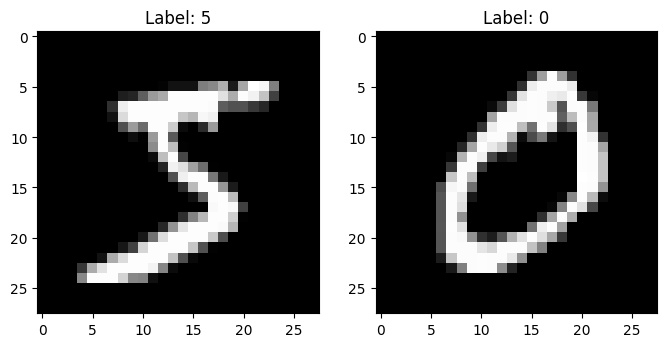

In [5]:
plt.figure(figsize=(8, 4))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
plt.show()


## Build the MLP **model**

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Input layer (Flatten the 28x28 image)
model.add(Dense(128, activation='relu'))   # Hidden layer with 128 neurons
model.add(Dense(64, activation='relu'))    # Hidden layer with 64 neurons
model.add(Dense(10, activation='softmax'))  # Output layer with 10 neurons (one for each digit)

## Compile and **train** the model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2394 - accuracy: 0.9303 - val_loss: 0.1252 - val_accuracy: 0.9609
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1005 - accuracy: 0.9693 - val_loss: 0.1098 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0713 - accuracy: 0.9770 - val_loss: 0.0821 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0788 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0721 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0829 - val_accuracy: 0.9761
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 0.0785 - val_accura

# Evaluate the model on the test dataset


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Loss: {history.history['loss'][-1]:.4f}, Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Training Loss: 0.0183, Training Accuracy: 0.9938
Test Loss: 0.0892, Test Accuracy: 0.9809


# Plot loss and accuracy

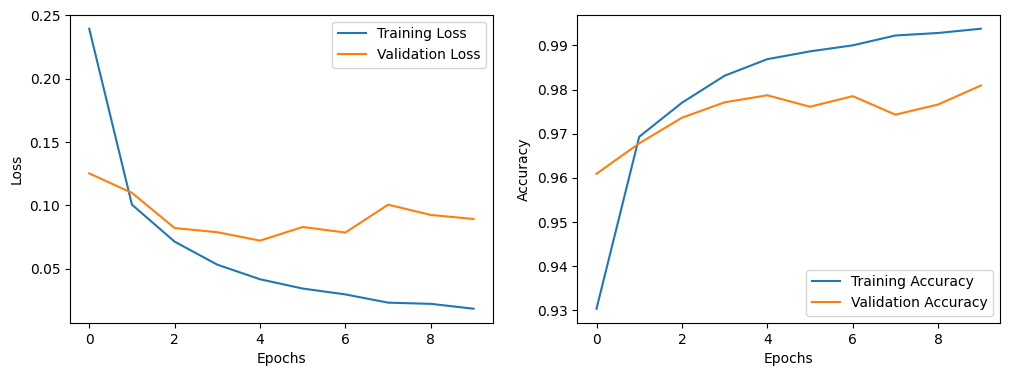

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()